<a href="https://colab.research.google.com/github/dmod99/COVID19_Predict/blob/main/data_6_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imorting all libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
import statistics


# New Section

In [ ]:
#read and shuffle data
df = pd.read_csv("/content/Dataset-6.csv")
df = df.sample(frac = 1,random_state=2)

In [ ]:
df.columns

Index(['Eosinophils_(normalized_–_counts/µL)',
       'Monocytes_(normalized_–_counts/µL)',
       'Platelets_(normalized_–_counts(×10^3)/µL)',
       'Hematocrit_(normalized_–_percentage)',
       'Erythrocytes_(normalized_–_counts(×10^6)/µL)',
       'Lymphocytes_(normalized_–_counts/µL)',
       'Neutrophils_(normalized_–_counts/µL)',
       'Basophils_(normalized_–_counts/µL)',
       'Serum_Albumin_(normalized_–_g/dL)',
       'Mature_Neutrophils_(normalized_–_counts/µL)',
       'Total_Bilirubin_(normalized_–_mg/dL)',
       'Serum_Ca_(normalized_–_mmol/L)',
       'Lactate_Dehydrogenase_(normalized_–_U/L)',
       'Serum_Ferritin_(normalized_–_ng/mL)',
       'Serum_Phosphorus_(normalized_–_mg/dL)', 'Gamma-GT_(normalized_–_U/L)',
       'Serum_Magnesium_(normalized_–_mEq/L)',
       'pO2_–_Arterial_(normalized_–_mm_Hg)', 'AST_(normalized_–_U/L)',
       'ALT_(normalized_–_U/L)', 'SARS-CoV-2'],
      dtype='object')

In [ ]:
df

,Eosinophils_(normalized_–_counts/µL),Monocytes_(normalized_–_counts/µL),Platelets_(normalized_–_counts(×10^3)/µL),Hematocrit_(normalized_–_percentage),Erythrocytes_(normalized_–_counts(×10^6)/µL),Lymphocytes_(normalized_–_counts/µL),Neutrophils_(normalized_–_counts/µL),Basophils_(normalized_–_counts/µL),Serum_Albumin_(normalized_–_g/dL),Mature_Neutrophils_(normalized_–_counts/µL),Total_Bilirubin_(normalized_–_mg/dL),Serum_Ca_(normalized_–_mmol/L),Lactate_Dehydrogenase_(normalized_–_U/L),Serum_Ferritin_(normalized_–_ng/mL),Serum_Phosphorus_(normalized_–_mg/dL),Gamma-GT_(normalized_–_U/L),Serum_Magnesium_(normalized_–_mEq/L),pO2_–_Arterial_(normalized_–_mm_Hg),AST_(normalized_–_U/L),ALT_(normalized_–_U/L),SARS-CoV-2
6507,-1.795556,0.646667,-0.400000,-0.290909,-1.114286,-1.9200,5.212063,-2.00,NaN,NaN,-0.909091,NaN,NaN,NaN,NaN,NaN,2.8,-7.08,6.000,4.048780,1
37,-2.168889,-1.520000,-1.040000,-1.400000,-0.436364,-1.6020,-1.582857,-1.52,NaN,NaN,0.909091,NaN,16.227848,NaN,NaN,NaN,NaN,29.20,10.750,14.242424,1
5420,-1.484444,-1.146667,-0.586667,-1.200000,-0.285714,-0.4840,-1.367619,-0.80,NaN,NaN,-0.909091,NaN,1.733333,NaN,NaN,-0.037736,NaN,NaN,-0.400,-0.243902,1
6950,-1.022222,0.146667,-1.200000,-0.160000,-0.363636,-1.4240,-0.851429,-1.12,NaN,NaN,-0.545455,-0.117647,21.189873,4.692913,1.8,16.193548,-2.8,NaN,NaN,2.160000,1
6935,-0.577778,1.460000,-1.653333,-1.454545,-1.400000,0.8260,-0.626032,-0.24,NaN,NaN,-0.909091,NaN,0.800000,NaN,NaN,-0.641509,NaN,NaN,NaN,-1.200000,0
6848,-1.217778,-1.353333,0.333333,0.400000,1.200000,-0.7840,0.736508,0.28,NaN,NaN,-1.272727,NaN,-1.848101,NaN,NaN,-1.483871,NaN,NaN,NaN,-1.680000,0
3528,-2.444444,-0.860000,-2.213333,-0.763636,-0.457143,-1.6040,-2.012698,-2.00,NaN,NaN,NaN,NaN,-0.755556,NaN,NaN,NaN,NaN,NaN,NaN,0.900000,1
661,-2.293333,-1.573333,0.880000,-5.240000,-5.236364,-0.3320,6.565079,-0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.806452,NaN,NaN,NaN,0.880000,0
1660,-2.355556,0.340000,-1.346667,0.680000,1.781818,-0.7160,-1.184127,-1.16,NaN,NaN,-1.636364,NaN,-0.278481,NaN,NaN,-0.709677,NaN,NaN,NaN,-0.400000,1
4832,-1.884444,-1.646667,-0.800000,1.880000,2.800000,-1.1180,1.545397,-1.28,NaN,NaN,-0.545455,NaN,NaN,NaN,NaN,-0.967742,NaN,NaN,NaN,0.080000,0


In [ ]:
df['SARS-CoV-2'].value_counts()

0    4967
1    2182
Name: SARS-CoV-2, dtype: int64

In [ ]:
df.shape

(7149, 21)

In [ ]:
#dropping id column as it is not a valid attribute to train model
#df = df.drop(['Unnamed: 0'], axis = 1)
#df = df.drop(['New_ID'], axis = 1)

In [ ]:
df

,Eosinophils_(normalized_–_counts/µL),Monocytes_(normalized_–_counts/µL),Platelets_(normalized_–_counts(×10^3)/µL),Hematocrit_(normalized_–_percentage),Erythrocytes_(normalized_–_counts(×10^6)/µL),Lymphocytes_(normalized_–_counts/µL),Neutrophils_(normalized_–_counts/µL),Basophils_(normalized_–_counts/µL),Serum_Albumin_(normalized_–_g/dL),Mature_Neutrophils_(normalized_–_counts/µL),Total_Bilirubin_(normalized_–_mg/dL),Serum_Ca_(normalized_–_mmol/L),Lactate_Dehydrogenase_(normalized_–_U/L),Serum_Ferritin_(normalized_–_ng/mL),Serum_Phosphorus_(normalized_–_mg/dL),Gamma-GT_(normalized_–_U/L),Serum_Magnesium_(normalized_–_mEq/L),pO2_–_Arterial_(normalized_–_mm_Hg),AST_(normalized_–_U/L),ALT_(normalized_–_U/L),SARS-CoV-2
6507,-1.795556,0.646667,-0.400000,-0.290909,-1.114286,-1.9200,5.212063,-2.00,NaN,NaN,-0.909091,NaN,NaN,NaN,NaN,NaN,2.8,-7.08,6.000,4.048780,1
37,-2.168889,-1.520000,-1.040000,-1.400000,-0.436364,-1.6020,-1.582857,-1.52,NaN,NaN,0.909091,NaN,16.227848,NaN,NaN,NaN,NaN,29.20,10.750,14.242424,1
5420,-1.484444,-1.146667,-0.586667,-1.200000,-0.285714,-0.4840,-1.367619,-0.80,NaN,NaN,-0.909091,NaN,1.733333,NaN,NaN,-0.037736,NaN,NaN,-0.400,-0.243902,1
6950,-1.022222,0.146667,-1.200000,-0.160000,-0.363636,-1.4240,-0.851429,-1.12,NaN,NaN,-0.545455,-0.117647,21.189873,4.692913,1.8,16.193548,-2.8,NaN,NaN,2.160000,1
6935,-0.577778,1.460000,-1.653333,-1.454545,-1.400000,0.8260,-0.626032,-0.24,NaN,NaN,-0.909091,NaN,0.800000,NaN,NaN,-0.641509,NaN,NaN,NaN,-1.200000,0
6848,-1.217778,-1.353333,0.333333,0.400000,1.200000,-0.7840,0.736508,0.28,NaN,NaN,-1.272727,NaN,-1.848101,NaN,NaN,-1.483871,NaN,NaN,NaN,-1.680000,0
3528,-2.444444,-0.860000,-2.213333,-0.763636,-0.457143,-1.6040,-2.012698,-2.00,NaN,NaN,NaN,NaN,-0.755556,NaN,NaN,NaN,NaN,NaN,NaN,0.900000,1
661,-2.293333,-1.573333,0.880000,-5.240000,-5.236364,-0.3320,6.565079,-0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.806452,NaN,NaN,NaN,0.880000,0
1660,-2.355556,0.340000,-1.346667,0.680000,1.781818,-0.7160,-1.184127,-1.16,NaN,NaN,-1.636364,NaN,-0.278481,NaN,NaN,-0.709677,NaN,NaN,NaN,-0.400000,1
4832,-1.884444,-1.646667,-0.800000,1.880000,2.800000,-1.1180,1.545397,-1.28,NaN,NaN,-0.545455,NaN,NaN,NaN,NaN,-0.967742,NaN,NaN,NaN,0.080000,0


In [ ]:
df.isnull().any()

Eosinophils_(normalized_–_counts/µL)             True
Monocytes_(normalized_–_counts/µL)               True
Platelets_(normalized_–_counts(×10^3)/µL)        True
Hematocrit_(normalized_–_percentage)             True
Erythrocytes_(normalized_–_counts(×10^6)/µL)     True
Lymphocytes_(normalized_–_counts/µL)             True
Neutrophils_(normalized_–_counts/µL)             True
Basophils_(normalized_–_counts/µL)               True
Serum_Albumin_(normalized_–_g/dL)                True
Mature_Neutrophils_(normalized_–_counts/µL)      True
Total_Bilirubin_(normalized_–_mg/dL)             True
Serum_Ca_(normalized_–_mmol/L)                   True
Lactate_Dehydrogenase_(normalized_–_U/L)         True
Serum_Ferritin_(normalized_–_ng/mL)              True
Serum_Phosphorus_(normalized_–_mg/dL)            True
Gamma-GT_(normalized_–_U/L)                      True
Serum_Magnesium_(normalized_–_mEq/L)             True
pO2_–_Arterial_(normalized_–_mm_Hg)              True
AST_(normalized_–_U/L)      

In [ ]:
#df = df.fillna(lambda x: x.median())

In [ ]:
data = df.to_numpy()

data.shape

(7149, 21)

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(data)
#X_2 = X
SimpleImputer()
data = imp.transform(data)

data

array([[-1.79555556,  0.64666667, -0.4       , ...,  6.        ,
         4.04878049,  1.        ],
       [-2.16888889, -1.52      , -1.04      , ..., 10.75      ,
        14.24242424,  1.        ],
       [-1.48444444, -1.14666667, -0.58666667, ..., -0.4       ,
        -0.24390244,  1.        ],
       ...,
       [-2.27555556,  0.13333333,  0.        , ...,  0.375     ,
         0.4       ,  1.        ],
       [ 8.27555556,  1.02      , -0.16      , ..., -0.125     ,
        -0.78787879,  0.        ],
       [-1.93777778,  7.92      , -0.26666667, ...,  0.375     ,
         0.88      ,  1.        ]])

In [ ]:
#splitting into 7 folds
data_g = np.array_split(data, 7)

## **LOGISTIC REGRESSION**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7743023038022101
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.82      0.90      0.86       741
Covid Positive       0.64      0.47      0.55       281

      accuracy                           0.78      1022
     macro avg       0.73      0.69      0.70      1022
  weighted avg       0.77      0.78      0.77      1022

------------------TRAINING-----------------
                precision    recall  f1-score   support

Covid Negative       0.77      0.92      0.84      4226
Covid Positive       0.69      0.41      0.51      1901

      accuracy                           0.76      6127
     macro avg       0.73      0.66      0.68      6127
  weighted avg       0.75      0.76      0.74      6127



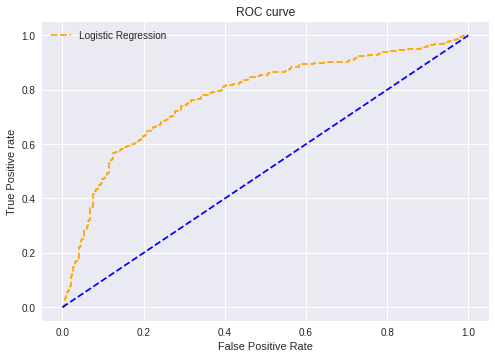

In [ ]:
accuracy_log_test = []
accuracy_log_train = []
classif_log_test=[]
classif_log_train=[]

for i in range(7):
  if i == 1:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:20])
                train_data_y.append(data_g[j][w][20])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:20])
                test_data_y.append(data_g[j][w][20])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn 
    clf = LogisticRegression(random_state = 0)
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr1, tpr1, thresh1 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    #calculating and appending accuracies
    acc1_log = accuracy_score(test_data_yn, test_pred_y_log)
    accuracy_log_test.append(acc1_log)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))
    print("------------------TRAINING-----------------")
    acc2_log = accuracy_score(train_data_yn, train_pred_y_log)
    accuracy_log_train.append(acc2_log)
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(train_data_yn, train_pred_y_log, target_names=target_names))


In [ ]:
#Creating the Confusion matrix
cm= confusion_matrix(test_data_yn, test_pred_y_log)
cm

array([[667,  74],
       [148, 133]])

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_log_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_log_train))


Mean accuracy for test set =  0.7827788649706457
Mean accuracy for train set =  0.760078341765954


# **NAIVE BAYES**

0.7250613530815815
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.85      0.72      0.78       741
Covid Positive       0.47      0.67      0.55       281

      accuracy                           0.70      1022
     macro avg       0.66      0.69      0.66      1022
  weighted avg       0.75      0.70      0.72      1022



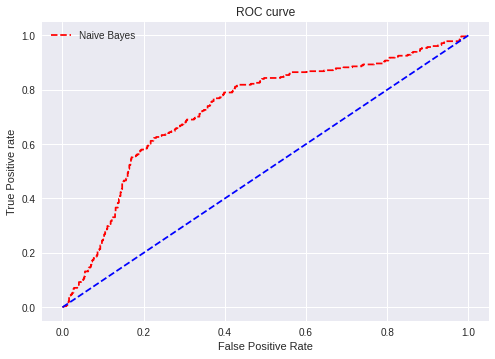

In [ ]:
accuracy_nb_test = []
accuracy_nb_train = []

for i in range(7):
  if i == 1:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:20])
                train_data_y.append(data_g[j][w][20])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:20])
                test_data_y.append(data_g[j][w][20])
       
    #convert into array         
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = GaussianNB()
    clf.fit(train_data_xn, train_data_yn)

    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr2, tpr2, thresh2 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_nb = clf.predict(test_data_xn)
    train_pred_y_nb = clf.predict(train_data_xn)

    #calculating and appending accuracies
    acc1_nb = accuracy_score(test_data_yn, test_pred_y_nb)
    accuracy_nb_test.append(acc1_nb)
    
    acc2_nb = accuracy_score(train_data_yn, train_pred_y_nb)
    accuracy_nb_train.append(acc2_nb)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_nb_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_nb_train))

Mean accuracy for test set =  0.7025440313111546
Mean accuracy for train set =  0.7200913987269463


# ***Fisher Linear Discriminant***

0.7549334601216975
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.76      0.95      0.85       741
Covid Positive       0.65      0.23      0.34       281

      accuracy                           0.75      1022
     macro avg       0.71      0.59      0.59      1022
  weighted avg       0.73      0.75      0.71      1022



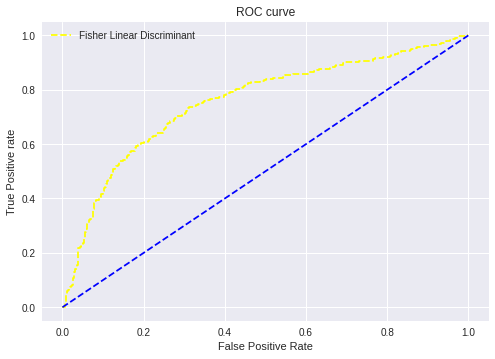

In [ ]:
accuracy_fl_test = []
accuracy_fl_train = []

for i in range(7):
  if i == 1:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:20])
                train_data_y.append(data_g[j][w][20])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:20])
                test_data_y.append(data_g[j][w][20])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = LinearDiscriminantAnalysis()
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr3, tpr3, thresh3 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_fl = clf.predict(test_data_xn)
    train_pred_y_fl = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_fl = accuracy_score(test_data_yn, test_pred_y_fl)
    accuracy_fl_test.append(acc1_fl)
    
    acc2_fl = accuracy_score(train_data_yn, train_pred_y_fl)
    accuracy_fl_train.append(acc2_fl)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_fl_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_fl_train))

Mean accuracy for test set =  0.7534246575342466
Mean accuracy for train set =  0.7274359392851314


# **KNN**

In [ ]:
df

,Eosinophils_(normalized_–_counts/µL),Monocytes_(normalized_–_counts/µL),Platelets_(normalized_–_counts(×10^3)/µL),Hematocrit_(normalized_–_percentage),Erythrocytes_(normalized_–_counts(×10^6)/µL),Lymphocytes_(normalized_–_counts/µL),Neutrophils_(normalized_–_counts/µL),Basophils_(normalized_–_counts/µL),Serum_Albumin_(normalized_–_g/dL),Mature_Neutrophils_(normalized_–_counts/µL),Total_Bilirubin_(normalized_–_mg/dL),Serum_Ca_(normalized_–_mmol/L),Lactate_Dehydrogenase_(normalized_–_U/L),Serum_Ferritin_(normalized_–_ng/mL),Serum_Phosphorus_(normalized_–_mg/dL),Gamma-GT_(normalized_–_U/L),Serum_Magnesium_(normalized_–_mEq/L),pO2_–_Arterial_(normalized_–_mm_Hg),AST_(normalized_–_U/L),ALT_(normalized_–_U/L),SARS-CoV-2
6507,-1.795556,0.646667,-0.400000,-0.290909,-1.114286,-1.9200,5.212063,-2.00,NaN,NaN,-0.909091,NaN,NaN,NaN,NaN,NaN,2.8,-7.08,6.000,4.048780,1
37,-2.168889,-1.520000,-1.040000,-1.400000,-0.436364,-1.6020,-1.582857,-1.52,NaN,NaN,0.909091,NaN,16.227848,NaN,NaN,NaN,NaN,29.20,10.750,14.242424,1
5420,-1.484444,-1.146667,-0.586667,-1.200000,-0.285714,-0.4840,-1.367619,-0.80,NaN,NaN,-0.909091,NaN,1.733333,NaN,NaN,-0.037736,NaN,NaN,-0.400,-0.243902,1
6950,-1.022222,0.146667,-1.200000,-0.160000,-0.363636,-1.4240,-0.851429,-1.12,NaN,NaN,-0.545455,-0.117647,21.189873,4.692913,1.8,16.193548,-2.8,NaN,NaN,2.160000,1
6935,-0.577778,1.460000,-1.653333,-1.454545,-1.400000,0.8260,-0.626032,-0.24,NaN,NaN,-0.909091,NaN,0.800000,NaN,NaN,-0.641509,NaN,NaN,NaN,-1.200000,0
6848,-1.217778,-1.353333,0.333333,0.400000,1.200000,-0.7840,0.736508,0.28,NaN,NaN,-1.272727,NaN,-1.848101,NaN,NaN,-1.483871,NaN,NaN,NaN,-1.680000,0
3528,-2.444444,-0.860000,-2.213333,-0.763636,-0.457143,-1.6040,-2.012698,-2.00,NaN,NaN,NaN,NaN,-0.755556,NaN,NaN,NaN,NaN,NaN,NaN,0.900000,1
661,-2.293333,-1.573333,0.880000,-5.240000,-5.236364,-0.3320,6.565079,-0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.806452,NaN,NaN,NaN,0.880000,0
1660,-2.355556,0.340000,-1.346667,0.680000,1.781818,-0.7160,-1.184127,-1.16,NaN,NaN,-1.636364,NaN,-0.278481,NaN,NaN,-0.709677,NaN,NaN,NaN,-0.400000,1
4832,-1.884444,-1.646667,-0.800000,1.880000,2.800000,-1.1180,1.545397,-1.28,NaN,NaN,-0.545455,NaN,NaN,NaN,NaN,-0.967742,NaN,NaN,NaN,0.080000,0


In [ ]:
y=df[['SARS-CoV-2']] 
y

,SARS-CoV-2
6507,1
37,1
5420,1
6950,1
6935,0
6848,0
3528,1
661,0
1660,1
4832,0


In [ ]:
x=df.drop(['SARS-CoV-2'], axis = 1)
x

,Eosinophils_(normalized_–_counts/µL),Monocytes_(normalized_–_counts/µL),Platelets_(normalized_–_counts(×10^3)/µL),Hematocrit_(normalized_–_percentage),Erythrocytes_(normalized_–_counts(×10^6)/µL),Lymphocytes_(normalized_–_counts/µL),Neutrophils_(normalized_–_counts/µL),Basophils_(normalized_–_counts/µL),Serum_Albumin_(normalized_–_g/dL),Mature_Neutrophils_(normalized_–_counts/µL),Total_Bilirubin_(normalized_–_mg/dL),Serum_Ca_(normalized_–_mmol/L),Lactate_Dehydrogenase_(normalized_–_U/L),Serum_Ferritin_(normalized_–_ng/mL),Serum_Phosphorus_(normalized_–_mg/dL),Gamma-GT_(normalized_–_U/L),Serum_Magnesium_(normalized_–_mEq/L),pO2_–_Arterial_(normalized_–_mm_Hg),AST_(normalized_–_U/L),ALT_(normalized_–_U/L)
6507,-1.795556,0.646667,-0.400000,-0.290909,-1.114286,-1.9200,5.212063,-2.00,NaN,NaN,-0.909091,NaN,NaN,NaN,NaN,NaN,2.8,-7.08,6.000,4.048780
37,-2.168889,-1.520000,-1.040000,-1.400000,-0.436364,-1.6020,-1.582857,-1.52,NaN,NaN,0.909091,NaN,16.227848,NaN,NaN,NaN,NaN,29.20,10.750,14.242424
5420,-1.484444,-1.146667,-0.586667,-1.200000,-0.285714,-0.4840,-1.367619,-0.80,NaN,NaN,-0.909091,NaN,1.733333,NaN,NaN,-0.037736,NaN,NaN,-0.400,-0.243902
6950,-1.022222,0.146667,-1.200000,-0.160000,-0.363636,-1.4240,-0.851429,-1.12,NaN,NaN,-0.545455,-0.117647,21.189873,4.692913,1.8,16.193548,-2.8,NaN,NaN,2.160000
6935,-0.577778,1.460000,-1.653333,-1.454545,-1.400000,0.8260,-0.626032,-0.24,NaN,NaN,-0.909091,NaN,0.800000,NaN,NaN,-0.641509,NaN,NaN,NaN,-1.200000
6848,-1.217778,-1.353333,0.333333,0.400000,1.200000,-0.7840,0.736508,0.28,NaN,NaN,-1.272727,NaN,-1.848101,NaN,NaN,-1.483871,NaN,NaN,NaN,-1.680000
3528,-2.444444,-0.860000,-2.213333,-0.763636,-0.457143,-1.6040,-2.012698,-2.00,NaN,NaN,NaN,NaN,-0.755556,NaN,NaN,NaN,NaN,NaN,NaN,0.900000
661,-2.293333,-1.573333,0.880000,-5.240000,-5.236364,-0.3320,6.565079,-0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.806452,NaN,NaN,NaN,0.880000
1660,-2.355556,0.340000,-1.346667,0.680000,1.781818,-0.7160,-1.184127,-1.16,NaN,NaN,-1.636364,NaN,-0.278481,NaN,NaN,-0.709677,NaN,NaN,NaN,-0.400000
4832,-1.884444,-1.646667,-0.800000,1.880000,2.800000,-1.1180,1.545397,-1.28,NaN,NaN,-0.545455,NaN,NaN,NaN,NaN,-0.967742,NaN,NaN,NaN,0.080000


In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(x)
#X_2 = X
SimpleImputer()
X = imp.transform(x)
X

array([[-1.79555556,  0.64666667, -0.4       , ..., -7.08      ,
         6.        ,  4.04878049],
       [-2.16888889, -1.52      , -1.04      , ..., 29.2       ,
        10.75      , 14.24242424],
       [-1.48444444, -1.14666667, -0.58666667, ...,  2.4       ,
        -0.4       , -0.24390244],
       ...,
       [-2.27555556,  0.13333333,  0.        , ...,  2.4       ,
         0.375     ,  0.4       ],
       [ 8.27555556,  1.02      , -0.16      , ...,  2.4       ,
        -0.125     , -0.78787879],
       [-1.93777778,  7.92      , -0.26666667, ...,  2.4       ,
         0.375     ,  0.88      ]])

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.1, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7982628148475475


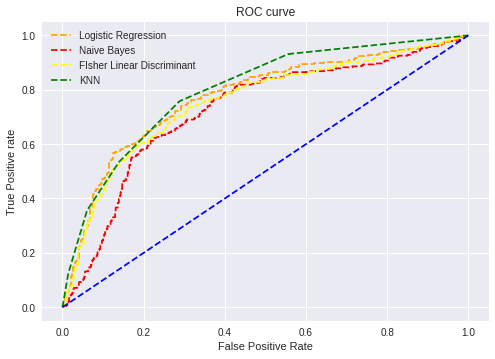

In [ ]:
#Fitting K-NN classifier to the training set
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)
#importing model from sklearn 
    
    #predict class
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve

    # roc curve for models
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

    # matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='FIsher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
#Creating the Confusion matrix
cm= confusion_matrix(y_test, y_pred)

In [ ]:
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 76.08%
The Confusion Matrix is:
  [[427  69]
 [102 117]]
                precision    recall  f1-score   support

Covid Negative       0.81      0.86      0.83       496
Covid Positive       0.63      0.53      0.58       219

      accuracy                           0.76       715
     macro avg       0.72      0.70      0.71       715
  weighted avg       0.75      0.76      0.75       715



In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(scale_pos_weight = 0.9)
eval_set = [(x_train, y_train), (x_test, y_test)]
classifier.fit(x_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.9, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
cm= confusion_matrix(y_test, y_pred)
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)

Accuracy: 79.86%
The Confusion Matrix is:
  [[456  40]
 [104 115]]
                precision    recall  f1-score   support

Covid Negative       0.81      0.92      0.86       496
Covid Positive       0.74      0.53      0.61       219

      accuracy                           0.80       715
     macro avg       0.78      0.72      0.74       715
  weighted avg       0.79      0.80      0.79       715



In [ ]:
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve

    # roc curve for models
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')


0.8590550891147444



# New Section

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 78.32%
The Confusion Matrix is:
  [[446  50]
 [105 114]]
                precision    recall  f1-score   support

Covid Negative       0.81      0.90      0.85       496
Covid Positive       0.70      0.52      0.60       219

      accuracy                           0.78       715
     macro avg       0.75      0.71      0.72       715
  weighted avg       0.77      0.78      0.77       715

0.8290801296214464


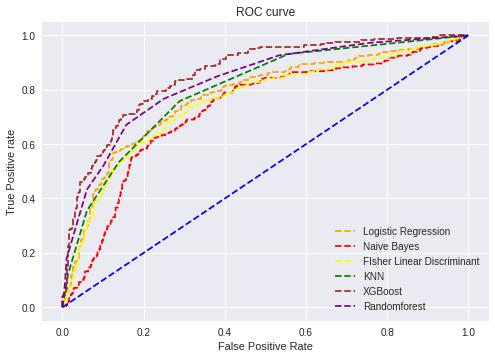

In [ ]:
eval_set = [(x_train, y_train), (x_test, y_test)]
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred
cm= confusion_matrix(y_test, y_pred)
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve

    # roc curve for models
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='FIsher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='brown', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='Randomforest')



plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
classifier.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 73.99%
The Confusion Matrix is:
  [[476  20]
 [166  53]]
                precision    recall  f1-score   support

Covid Negative       0.74      0.96      0.84       496
Covid Positive       0.73      0.24      0.36       219

      accuracy                           0.74       715
     macro avg       0.73      0.60      0.60       715
  weighted avg       0.74      0.74      0.69       715

0.7946034025629695


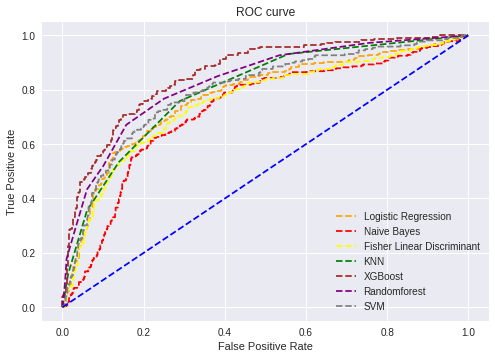

In [ ]:
eval_set = [(x_train, y_train), (x_test, y_test)]
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred
cm= confusion_matrix(y_test, y_pred)
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve

    # roc curve for models
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='brown', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='Randomforest')
plt.plot(fpr7, tpr7, linestyle='--',color='grey', label='SVM')


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
!pip3 install pandas_ml
!pip3 install scikit-learn==0.21
!pip3 install pandas==0.24.2

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


AUC Score is  0.8488193159543481 

CONFUSION MATRIX -
 Predicted  False  True  __all__
Actual                         
False        380   114      494
True          52   169      221
__all__      432   283      715 

population: 715
P: 221
N: 494
PositiveTest: 283
NegativeTest: 432
TP: 169
TN: 380
FP: 114
FN: 52
TPR: 0.7647058823529411
TNR: 0.7692307692307693
PPV: 0.5971731448763251
NPV: 0.8796296296296297
FPR: 0.23076923076923078
FDR: 0.4028268551236749
FNR: 0.23529411764705882
ACC: 0.7678321678321678
F1_score: 0.6706349206349206
MCC: 0.504561668069952
informedness: 0.5339366515837103
markedness: 0.47680277450595465
prevalence: 0.3090909090909091
LRP: 3.313725490196078
LRN: 0.30588235294117644
DOR: 10.833333333333334
FOR: 0.12037037037037036


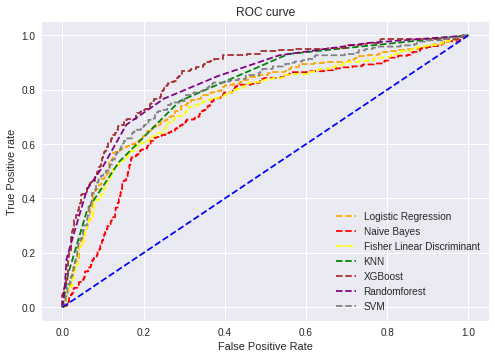

In [ ]:
from pandas_ml import ConfusionMatrix
dataset = pd.read_csv('/content/Dataset-6.csv')

total_neg_samples=sum(dataset['SARS-CoV-2']==0)
total_pos_samples=sum(dataset['SARS-CoV-2']==1)
scale_pos_weight = total_neg_samples / total_pos_samples

dataset.reset_index(inplace = True)

y = dataset[['SARS-CoV-2']]

X = dataset
X.drop(labels=None, axis=1, columns=['SARS-CoV-2','index'], level=None, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = XGBClassifier(use_label_encoder=False, scale_pos_weight = scale_pos_weight)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)

y_pred = model.predict(X_test)
test_probs = model.predict_proba(X_test)
test_probs = test_probs[:, 1]
auc = roc_auc_score(y_test, test_probs)
print('AUC Score is ', (auc), '\n')
from sklearn.metrics import roc_curve

    # roc curve for models
fpr8, tpr8, thresh8 = roc_curve(y_test, test_probs, pos_label=1)
pred = pd.DataFrame(y_pred, columns=['SARS-CoV-2'])
test = pd.DataFrame(y_test, columns=['SARS-CoV-2'])
test.reset_index(inplace = True)
test.drop(labels=None, axis=1, columns=['index'], level=None, inplace=True)

CM = ConfusionMatrix(test['SARS-CoV-2'], pred['SARS-CoV-2'])

print('CONFUSION MATRIX -\n',(CM), '\n')
CM.print_stats()
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(fpr8, tpr8, linestyle='--',color='brown', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='Randomforest')
plt.plot(fpr7, tpr7, linestyle='--',color='grey', label='SVM')


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();